# Random walk + AR-Modell 



## Rauschen

Gegeben sei Folge der Ziffern -1 und 1, die in zufälliger Reihenfolge erscheinen.

Der Mittelwert der Folge ist stabil, so auch die Streuung. 

Die Zeitreihe ist stationär.

/home/rp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


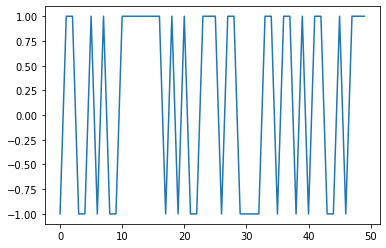

Partial means: 
0.000, 0.500, 0.000, 0.000, 0.250, 0.000, 1.000, 

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)

size=50

myser= 2* rng.integers(0,2, size = size)-1

plt.plot(myser)
plt.show()

print('Partial means: ')
mtests = 6
for i in range(mtests+1):
    print(f'{myser[i * int(size/mtests): (i+1) * int(size/mtests)].mean():1.3f}', end=', ')


## Random walk

Der Zufallswert  $\epsilon \in \{-1,+1\}$ wird zum vorangegangenen Wert $Y_{i-1}$ der Folge $Y_i$ hinzuaddiert. Anschaulich entspricht dies einer zurückgelegten Strecke. Die Konstante $\mu$ wid häufig auf null gesetzt.


$$
Y_i = \mu + Y_{i-1} + \epsilon
$$

Zur Schrittgröße und Zusammenhang zur Normalverteilung siehe auch Donskers Theorem.

Anschaulich: 

Die Begrenzung auf die Schrittweite "1" lässt sich auf eine normalverteilte Größe verallgemeinern. Dazu fasst man n-Schritte zusammen und normiert auf die Zahl der Schritte. Dann sind der Mittelwert der Schrittlänge null und die Streuung für n-> oo normalverteilt.

Beispiel: Zusammenfassen von 5 Schritten, beispielsweise  {1, -1, -1, 1, 1}. Die Schrittlänge beträgt in diesem Fall +1/5.

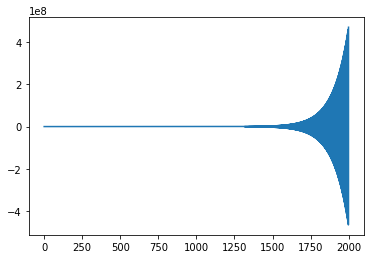

Partial means: 
-0.054, 1.319, -34.791, 955.785, -26265.584, 721778.091, 2330723.395, 

In [19]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng() #42)

size= 2000 # 300 # 2000
phi = -1.01 # 1 # -1.01 #1.01

# bernoulli
#myser= 2* rng.integers(0,2, size = size)-1
# or normal distributed:
myser = rng.normal(0,1, size=size)

arwalk = [0] # initvalues for up to AR(1)
for i in range (1, len(myser)):
    arwalk.append(myser[i] + phi * arwalk[i-1])
    

plt.plot(arwalk)
plt.show()

arwalk = np.array(arwalk)

print('Partial means: ')
mtests = 6
for i in range(mtests+1):
    print(f'{arwalk[i * int(size/mtests): (i+1) * int(size/mtests)].mean():1.3f}', end=', ')


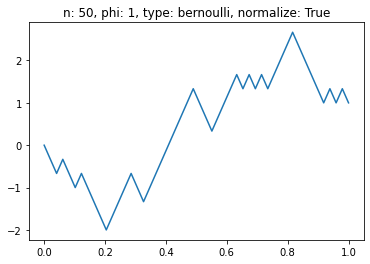

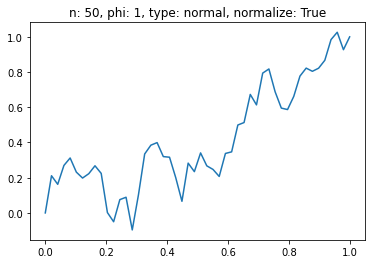

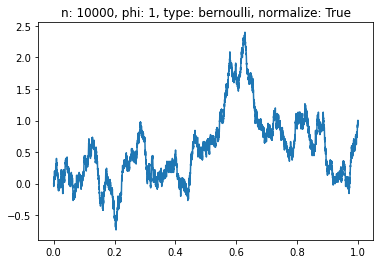

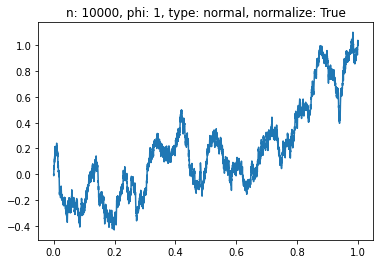

In [20]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng() #42)

def rw(size=200, phi = 1, rw_type = 'bernoulli', normalize = True):
    """
    Simulation of AR(1)
    """
    
    if rw_type == 'bernoulli': # +-1
        myser= 2* rng.integers(0,2, size = size)-1
    else: # normal distribution
        rw_type = 'normal'
        myser = rng.normal(0,1, size=size)

    arwalk = [0] # initvalues for up to AR(1)
    for i in range (1, len(myser)):
        arwalk.append(myser[i] + phi * arwalk[i-1])
        
    x = np.linspace(0,1, len(arwalk))
    if normalize:   
        arwalk = np.array(arwalk)
        arwalk = arwalk/arwalk[-1]
    plt.title(f'n: {size}, phi: {phi}, type: {rw_type}, normalize: {normalize}')
    plt.plot(x, arwalk)
    plt.show()
    
rw(size = 50, rw_type = 'bernoulli')
rw(size = 50, rw_type = 'normal')
rw(size = 10000, rw_type = 'bernoulli')
rw(size = 10000, rw_type = 'normal')



Ein *Random Walk* ist instationär, wie die Grafiken unmittelbar zeigen.

## Autoregression (AR)

Wie oben wird eine Zufallsfolge definiert, erweitert um einen Parameter $Phi$:

$$
Y_i = \mu + \Phi \cdot Y_{i-1} + \epsilon
$$

* Für $\Phi = 1$ entspricht dies genau dem *Random Walk* von oben.
* Für $\Phi > 1$ divergiert die Folge.
* Für $\Phi < 1$ erhält man eine stationäre AR-Reihe.



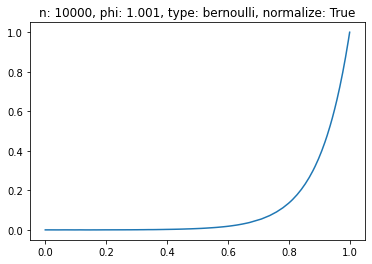

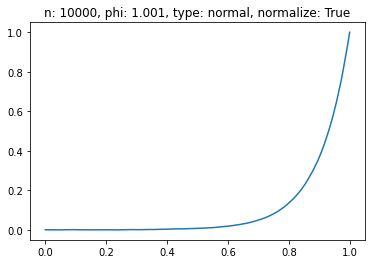

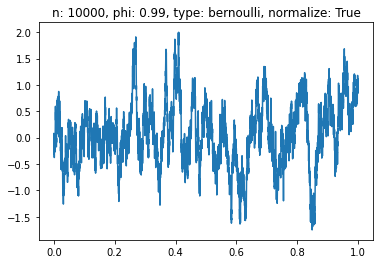

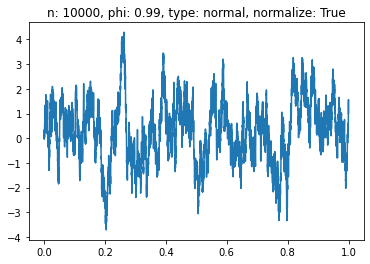

In [21]:
rw(size = 10000, phi=1.001, rw_type = 'bernoulli')
rw(size = 10000, phi=1.001, rw_type = 'normal')

rw(size = 10000, phi=0.99, rw_type = 'bernoulli')
rw(size = 10000, phi=0.99, rw_type = 'normal')

Eine weitere Verallgemeinerung betrifft den Grad der AR-Reihe, indem weitere vorangegangene Glieder berücksichtigt werden. Die Ziffer gibt die Zahl der Parameter an, hier zwei:

AR(2):

$$
Y_i = \mu + \Phi_i \cdot Y_{i-1} + \Phi_{i-1} \cdot Y_{i-2} + \epsilon
$$

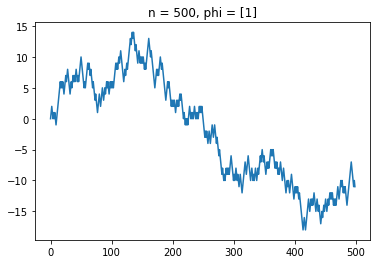

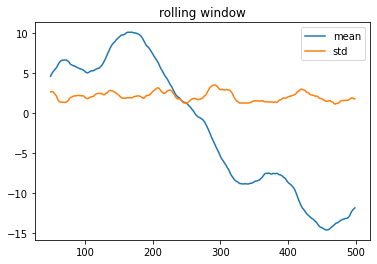

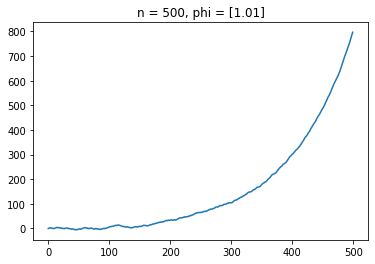

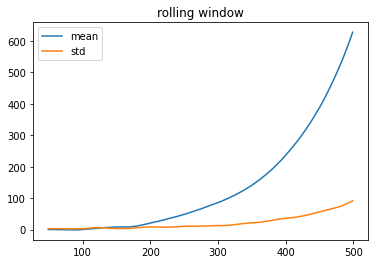

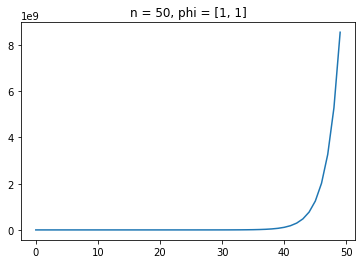

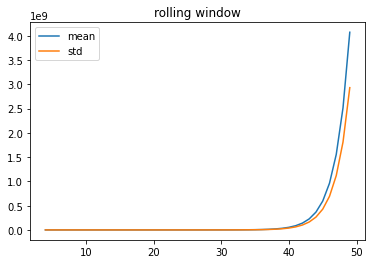

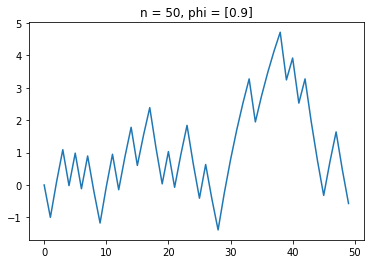

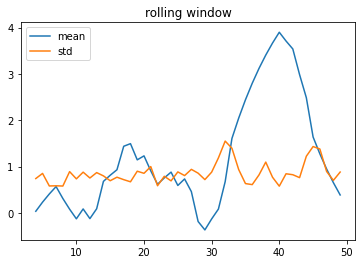

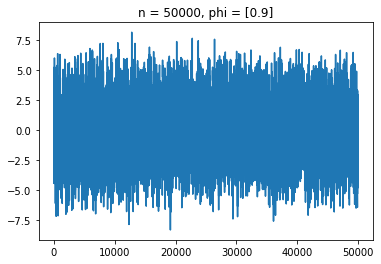

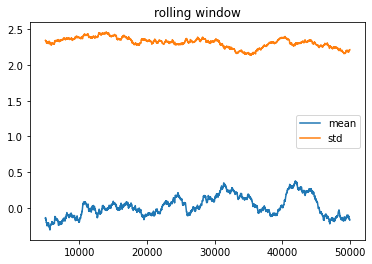

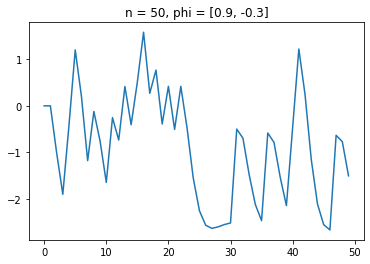

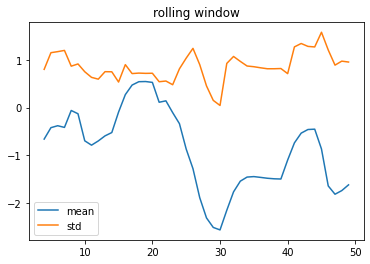

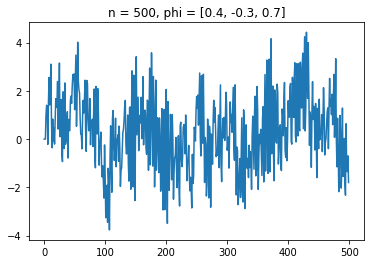

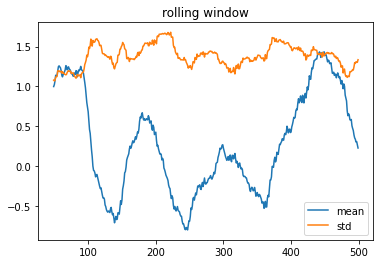

In [22]:
%reset -f

""" 
AR Model
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(42) 


def arn(phi=[1], size=100):
    """
    AR Simulation
    input: phi =[xi]; length of list defines degree of AR-Simulation
    """
    global rng

    size=size
    phi =  phi
    AR = len(phi)

    # noise
    myser= 2* rng.integers(0,2, size = size)-1

    arwalk = [0] * AR # initvalues for up to AR(AR)
    for i in range (AR, len(myser)):
        art = 0
        for j in range(AR):
            art += phi[j] * arwalk[-j-1]
            #print(j, phi[j])
            #print(art)
        arwalk.append(myser[i] + art)


    plt.plot(arwalk)
    plt.title(f'n = {size}, phi = {phi}')
    plt.show()

    #arwalk = np.array(arwalk)

    df = pd.DataFrame({'AR': arwalk})
    ds = df.iloc[:,0]
    
    ax = ds.rolling(window=int(size/10)).mean().plot(label="mean")
    ds.rolling(window=int(size/10)).std().plot(ax=ax, label="std")
    plt.title('rolling window')
    plt.legend()
    plt.show()
    
    return ds

ds = arn([1], 500)
ds = arn([1.01], 500)
ds = arn([1,1], 50)
ds = arn([0.9], 50)
ds = arn([0.9], 50000)
ds = arn([0.9, -0.3], 50)
ds = arn([0.4, -0.3, 0.7], 500)


## MA Modell

Während im *Auroregressive Modell (AR)* die zurückliegenden Werte wichtet, mittelt *Moving Average (MA)* die Fehlerterme $\epsilon$. Die Herleitung zur Bestimmung der als normal verteilten $\epsilon$-Werte ist deutlich umständlicher als beim *AR* Modell, da sie über ein Modell approximiert werden. Dafür lehnt sich der Vorhersagewert $y_{t}$ an *AR* an. Der Dämpfungsparameter wird hier mit $\Theta$ bezeichnet und es gilt:

$$
y_{t}=c+\varepsilon _{t}+\sum _{j=1}^{q}\Theta_{j}\varepsilon _{t-j}
$$

Weder *AR*, noch *MA* liefern belastbare Vorhersagen, weshalb beide zum *ARMA* Modell kombiniert werden. *AR* funktioniert nicht bei einem *Random Walk*, die Werde dürfen keinen Trend aufweisen. Dazu wird *ARMA* zu *ARIMA* erweitert. Das *I* (*integrated*) steht für eine Differenzbildung zur Eliminierung des Trends. 

Die Angabe ARIMA(2,1,2) besagt, dass AR und MA mit jeweils zwei Parametern und einer einfachen Differenzbildung simuliert werden. Das Modell ARIMA(0,1,1) hatten wir bereits kennengelernt. Es ist gleichwertig zur exponentiellen Glättung.

Mehr Parameter fitten besser, machen aber eine Vorhersage instabiler (s.a. Polynomfit). Als Fehlergröße dient deshalb weniger die Summe der Fehlerquadrate, sondern das *Akaike information criterion (AIC)*. Bei ähnlichem Ergebnis bewertet AIC das Modell besser, das mit weniger Parametern auskommt.

*SARIMA* berücksichtigt auch saisonale Effekte. Dafür erhält es neben den ARIMA(pdq)-Parametern einen weiteren Parametersatz (PDQ): SARIMA(p,d,q)(P,D,Q)m 

Die Saisonalität (Periode) wird dem Modell mitgegeben und nicht über einen Fit bestimmt.

## ARMA Simulation mit *statsmodels*

siehe auch:

* https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
* https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.fit.html


True
True
[1.5-1.32287566j 1.5+1.32287566j]
(1550,)


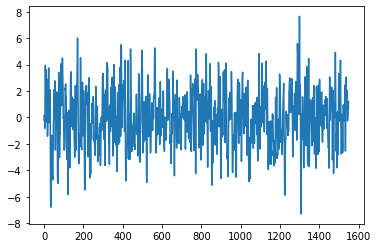

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)
print(arma_process.isstationary) # check AR
print(arma_process.isinvertible) # check MA
print(arma_process.arroots)
y = arma_process.generate_sample(1550)
print(y.shape)
x = list(range(0,len(y)))

plt.plot(x,y)
plt.show()

In [28]:
model = sm.tsa.ARIMA(y, order= (5, 0, 5)).fit()
print(model.params)

/home/rp/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/rp/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/rp/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[-0.02765832  0.27469177 -0.5277492  -0.39707725  0.29036148 -0.08940122
  1.11029266  1.27187405  1.28279023  0.80051656  0.29602604  0.96723686]


In [29]:
print('expected: ', arparams, maparams)
model.summary()

expected:  [ 0.75 -0.25] [0.65 0.35]


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1550
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -2176.131
Date:                Sat, 24 Feb 2024   AIC                           4376.261
Time:                        10:54:15   BIC                           4440.414
Sample:                             0   HQIC                          4400.121
                               - 1550                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0277      0.100     -0.276      0.783      -0.224       0.169
ar.L1          0.2747     26.940      0.010      0.992     -52.526      53.076
ar.L2         -0.5277     27.449     -0.019      0.985     -54.326      53.271
ar.L3         -0.3971     34.631     -0.011      0.991     -68.272      67.478
ar.L4          0.2904     15.017      0.019      0.985     -29.143      29.724
ar.L5         -0.0894      3.295     -0.027      0.978      -6.548       6.369
ma.L1          1.1103     26.937      0.041      0.967     -51.686      53.907
ma.L2          1.2719      9.863      0.129      0.897     -18.060      20.604
ma.L3          1.2828     26.908      0.048      0.962     -51.456      54.022
ma.L4          0.8005     14.565      0.055      0.956     -27.746      29.347
ma.L5          0.2960     10.718      0.028      0.978     -20.712      21.304
sigma2         0.9672      0.034     28.663      0.000       0.901       1.033
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.72
Prob(Q):                              0.99   Prob(JB):                         0.03
Heteroskedasticity (H):               0.98   Skew:                             0.14
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
AIC 	4372. bei Ordnung 2
AIC 	4376. bei Ordnung 5

In [39]:
# check ds, see above
ds = arn([0.4, -0.3, 0.7], 500)

model = sm.tsa.ARIMA(ds, order= (3, 0, 0)).fit()
print(model.params)

print('expected: ds = arn([0.4, -0.3, 0.7], 500)')
model.summary()

const    -0.062116
ar.L1    -0.005471
ar.L2    -0.007992
ar.L3     0.051226
sigma2    0.338772
dtype: float64
expected: ds = arn([0.4, -0.3, 0.7], 500)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -438.871
Date:                Fri, 23 Feb 2024   AIC                            887.741
Time:                        20:27:06   BIC                            908.814
Sample:                             0   HQIC                           896.010
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0621      0.028     -2.223      0.026      -0.117      -0.007
ar.L1         -0.0055      0.043     -0.126      0.900      -0.091       0.080
ar.L2         -0.0080      0.045     -0.179      0.858      -0.096       0.080
ar.L3          0.0512      0.045      1.134      0.257      -0.037       0.140
sigma2         0.3388      0.033     10.168      0.000       0.273       0.404
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                30.20
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.23
Prob(H) (two-sided):                  0.96   Kurtosis:                         1.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMA